## load test files and test data

In [1]:
# load data and import test files
%cd ../..
%matplotlib inline
import genomearray as ga
import numpy as np
import Bio.SeqIO as SeqIO
import pandas as pd
# load genome and gene table
mg1655_genome = SeqIO.read('genomearray/test/testdata/MG1655.gbk', 'genbank')
mg1655_gt = pd.DataFrame.from_csv('genomearray/test/testdata/MG1655_gt.csv')
# get regions and names of regions
coding_regions = mg1655_gt.loc[(mg1655_gt.ncbi_type == 'CDS')&(~np.isin(mg1655_gt.index,['flu','mazE','mazF'])),
                               ['strand','start','end']].values.astype(int)
coding_names = mg1655_gt.loc[(mg1655_gt.ncbi_type == 'CDS')&(~np.isin(mg1655_gt.index,['flu','mazE','mazF'])),
                               ['strand','start','end']].index.values.astype(str)
plot_regions = mg1655_gt.loc[:,['strand','start','end']].values.astype(int)
plot_names = mg1655_gt.index.values.astype(str)
# load test MazF data
paths = ['genomearray/test/testdata/79s1_unique.npy',
         'genomearray/test/testdata/79s2_unique.npy',
         'genomearray/test/testdata/80s1_unique.npy',
         'genomearray/test/testdata/80s2_unique.npy']
fd_79_ev1, fd_79_ev2, fd_80_mazF1, fd_80_mazF2 = ga.loadarrays(paths, normalization=ga.mediandensitynormalization,
                                                               log2=True, regions=coding_regions)
# get cleavage ratio and average fragment density
cr_mazF = np.mean([fd_80_mazF1, fd_80_mazF2], axis=0) - np.mean([fd_79_ev1,fd_79_ev2], axis=0)
fd_ev   = np.mean([fd_79_ev1,fd_79_ev2], axis=0)
import matplotlib.pyplot as plt
# lower dpi for easy visualization
plt.rcParams['figure.dpi'] = 125

/home/laublab/Dropbox (MIT)/culviner/repositories/genomearray


## test ga.signal.extrema

Identify local minima in the MazF cleavage ratio, ignoring low expression (empty vector) regions. Results of various gaussian smoothing sigmas and search distances on the input array are shown.

In [19]:
m_nosmooth_nosearch, _ = ga.signal.extrema(cr_mazF, output_mask=fd_ev>=6, smooth_sigma=None, search_nt=None)
m_20smooth_nosearch, _ = ga.signal.extrema(cr_mazF, output_mask=fd_ev>=6, smooth_sigma=20, search_nt=None)
m_20smooth_50search, _ = ga.signal.extrema(cr_mazF, output_mask=fd_ev>=6, smooth_sigma=20, search_nt=50)
m_100smooth_nosearch, _ = ga.signal.extrema(cr_mazF, output_mask=fd_ev>=6, smooth_sigma=100, search_nt=None)
m_100smooth_50search, _ = ga.signal.extrema(cr_mazF, output_mask=fd_ev>=6, smooth_sigma=100, search_nt=50) 

### no smooth / no search

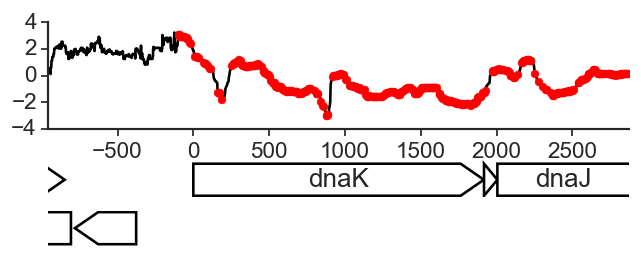

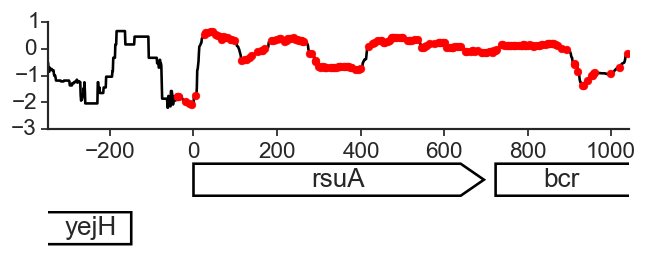

In [17]:
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_nosmooth_nosearch, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_nosmooth_nosearch, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima

### 20 smooth / no search

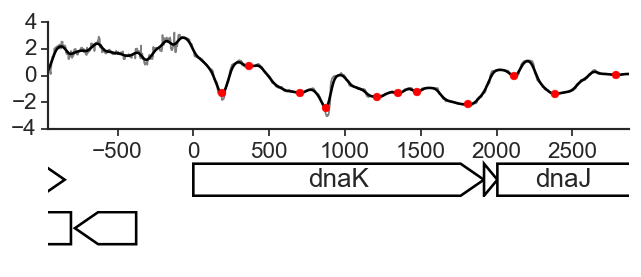

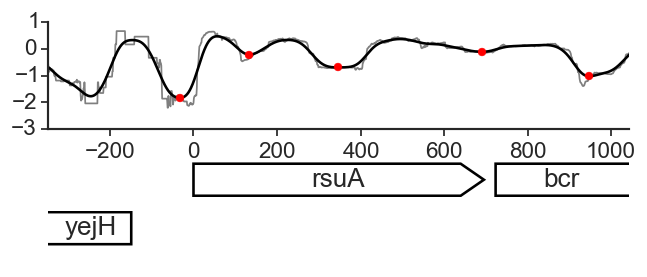

In [24]:
from scipy.ndimage.filters import gaussian_filter1d
smooth = 20
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', alpha=.5, lw=1) # plot MazF cleavage ratio line
plots.plotLine(axis_n=0, data=gaussian_filter1d(cr_mazF,smooth), color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_20smooth_nosearch, 
                    y_array = gaussian_filter1d(cr_mazF,smooth), color='r', zorder=5) # plot minima
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', alpha=.5, lw=1) # plot MazF cleavage ratio line
plots.plotLine(axis_n=0, data=gaussian_filter1d(cr_mazF,smooth), color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_20smooth_nosearch, 
                    y_array = gaussian_filter1d(cr_mazF,smooth), color='r', zorder=5) # plot minima

### 20 smooth / 50 search

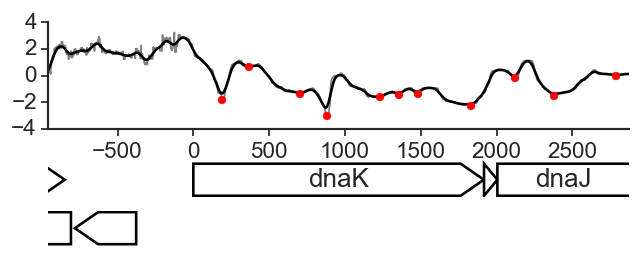

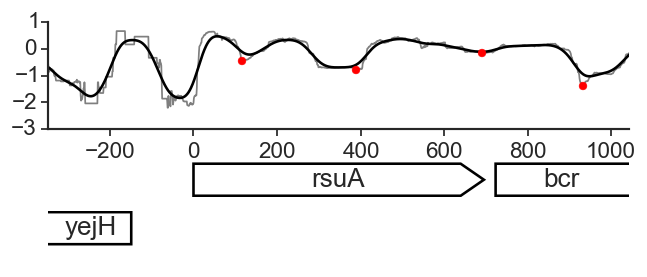

In [25]:
from scipy.ndimage.filters import gaussian_filter1d
smooth = 20
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', alpha=.5, lw=1) # plot MazF cleavage ratio line
plots.plotLine(axis_n=0, data=gaussian_filter1d(cr_mazF,smooth), color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_20smooth_50search, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', alpha=.5, lw=1) # plot MazF cleavage ratio line
plots.plotLine(axis_n=0, data=gaussian_filter1d(cr_mazF,smooth), color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_20smooth_50search, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima

### 100 smooth / no search

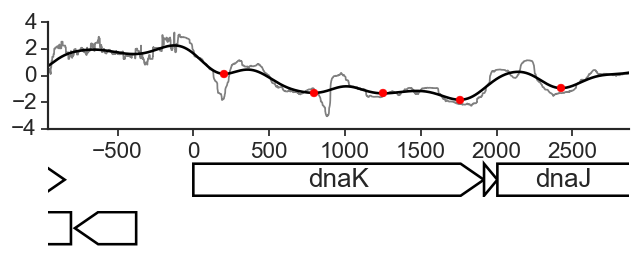

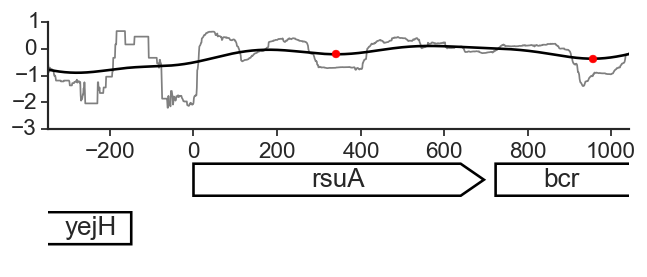

In [27]:
from scipy.ndimage.filters import gaussian_filter1d
smooth = 100
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', alpha=.5, lw=1) # plot MazF cleavage ratio line
plots.plotLine(axis_n=0, data=gaussian_filter1d(cr_mazF,smooth), color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_100smooth_nosearch, 
                    y_array = gaussian_filter1d(cr_mazF,smooth), color='r', zorder=5) # plot minima
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', alpha=.5, lw=1) # plot MazF cleavage ratio line
plots.plotLine(axis_n=0, data=gaussian_filter1d(cr_mazF,smooth), color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_100smooth_nosearch, 
                    y_array = gaussian_filter1d(cr_mazF,smooth), color='r', zorder=5) # plot minima

### 100 smooth / 50 search

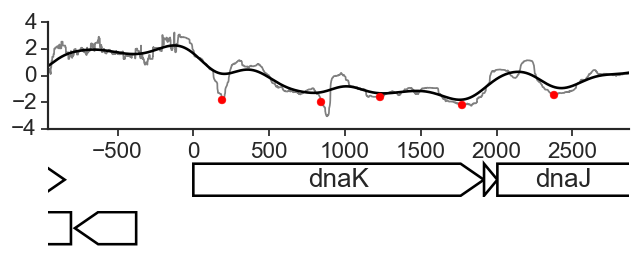

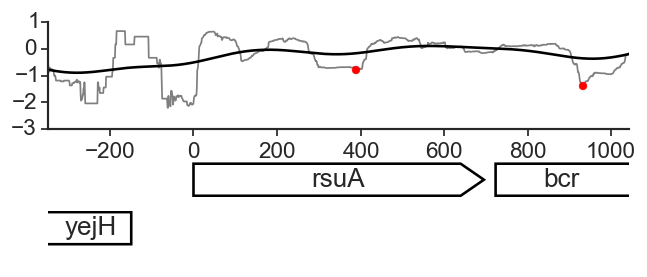

In [28]:
from scipy.ndimage.filters import gaussian_filter1d
smooth = 100
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', alpha=.5, lw=1) # plot MazF cleavage ratio line
plots.plotLine(axis_n=0, data=gaussian_filter1d(cr_mazF,smooth), color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_100smooth_50search, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', alpha=.5, lw=1) # plot MazF cleavage ratio line
plots.plotLine(axis_n=0, data=gaussian_filter1d(cr_mazF,smooth), color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = m_100smooth_50search, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima

## test ga.signal.eventdyperx

In [2]:
minima_positions, _ = ga.signal.extrema(cr_mazF, output_mask=fd_ev>=6, smooth_sigma=20, search_nt=25)

### test standard use

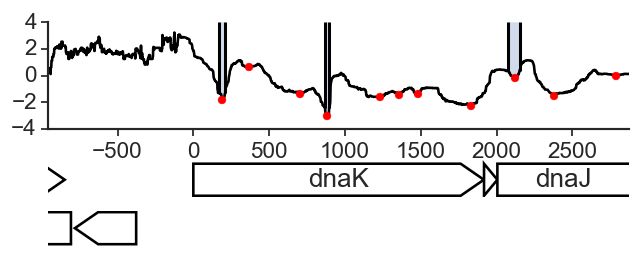

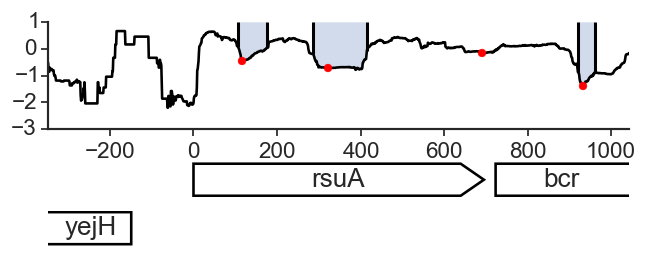

In [23]:
dy = (.5,.5)
dx = (100,100)
#
output_regions = ga.signal.eventdyperx(cr_mazF, minima_positions, dy, dx, collapse_regions=True)
# now plot genes
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)

### test overlapping kwargs

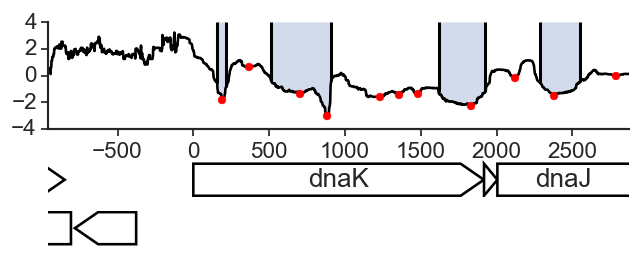

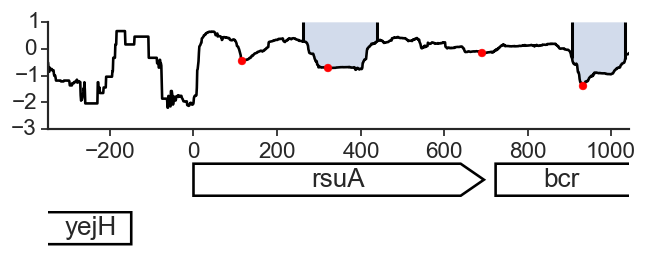

In [21]:
dy = (1,1)
dx = (300,300)
#
output_regions = ga.signal.eventdyperx(cr_mazF, minima_positions, dy, dx, collapse_regions=True)
# now plot genes
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)

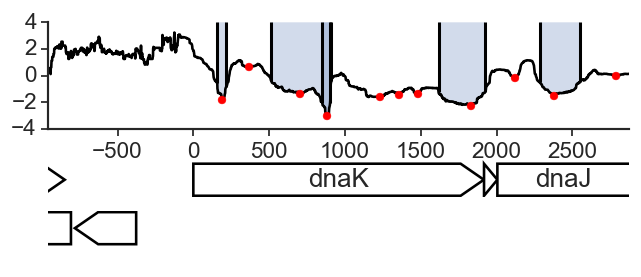

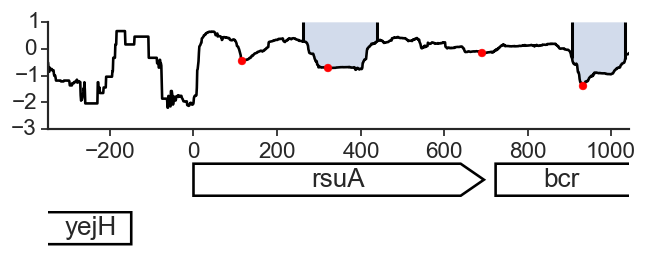

In [4]:
dy = (1,1)
dx = (300,300)
#
output_regions = ga.signal.eventdyperx(cr_mazF, minima_positions, dy, dx, collapse_regions=False)
# now plot genes
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)

### test 5'/3' scaling

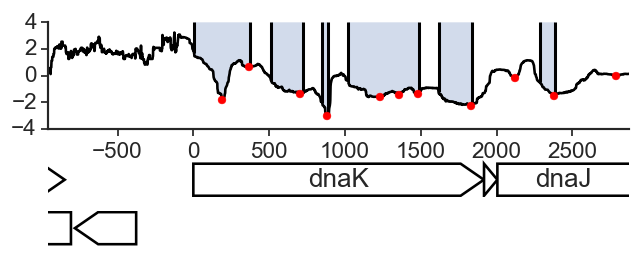

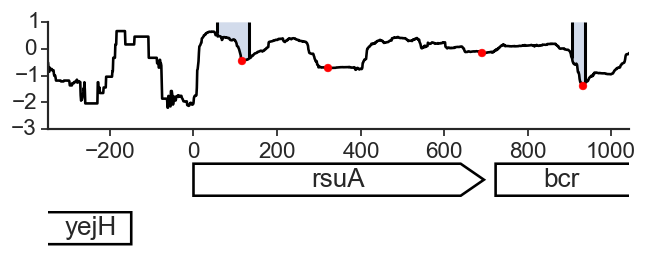

In [166]:
dy = (1,.1)
dx = (500,50)
#
output_regions = ga.signal.eventdyperx(cr_mazF, minima_positions, dy, dx, collapse_regions=True)
# now plot genes
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)

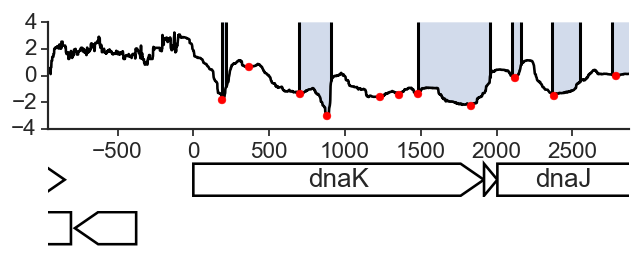

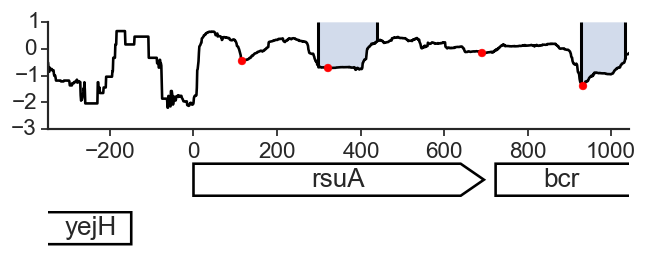

In [26]:
dy = (.1,1)
dx = (50,500)
#
output_regions = ga.signal.eventdyperx(cr_mazF, minima_positions, dy, dx, collapse_regions=True)
# now plot genes
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)
# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima_positions, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)

## test ga.signal.eventdpos

In [9]:
minima, _ = ga.signal.extrema(cr_mazF, output_mask=fd_ev>=6, smooth_sigma=20, search_nt=None)
maxima, _ = ga.signal.extrema(cr_mazF, extrema_type='max', output_mask=fd_ev>=6, smooth_sigma=20, search_nt=None)

### test 5' direction on both strands

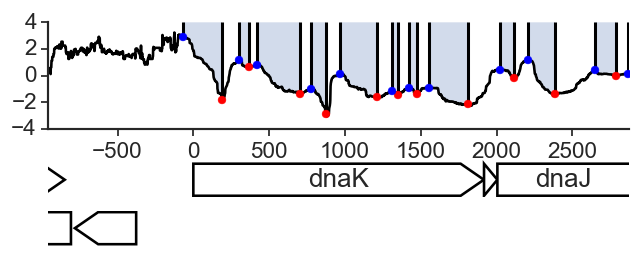

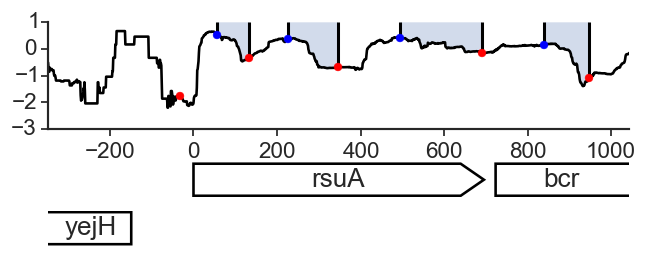

In [12]:
output_regions = ga.signal.eventdpos(minima, maxima, 500, direction='5_prime', collapse_regions = True)
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotPositions(axis_n = 0, positions = maxima, 
                    y_array = cr_mazF, color='b', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)

# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotPositions(axis_n = 0, positions = maxima, 
                    y_array = cr_mazF, color='b', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)

### test 3' direction on both strands

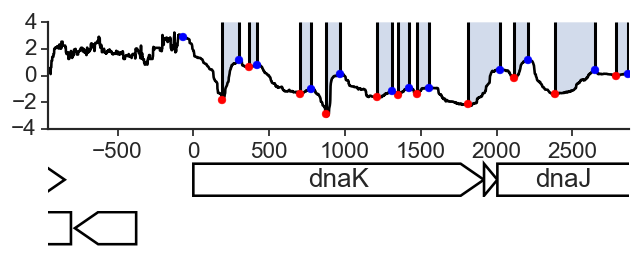

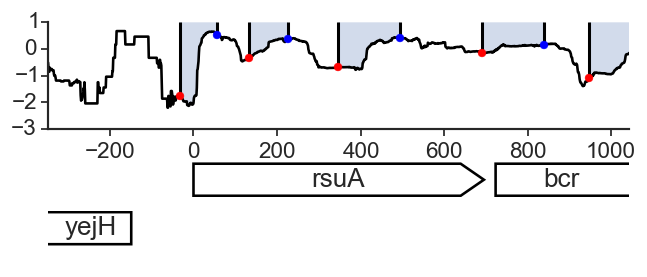

In [13]:
output_regions = ga.signal.eventdpos(minima, maxima, 500, direction='3_prime', collapse_regions = True)
# first strand example gene (dnaK)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='dnaK', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotPositions(axis_n = 0, positions = maxima, 
                    y_array = cr_mazF, color='b', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)

# second strand example gene (rsuA)
plots = ga.plot.RegionPlot(plot_names, plot_regions, 1, True, (6,2.5))
plots.setPosition_gene(name='rsuA', spacer=.5)
plots.plotLine(axis_n=0, data=cr_mazF, color='k', lw=1.5) # plot MazF cleavage ratio line
plots.plotPositions(axis_n = 0, positions = minima, 
                    y_array = cr_mazF, color='r', zorder=5) # plot minima
plots.plotPositions(axis_n = 0, positions = maxima, 
                    y_array = cr_mazF, color='b', zorder=5) # plot minima
plots.plotRegions(axis_n = 0, regions = output_regions, y_array = cr_mazF)